<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V2_Original_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [79]:
#original data
df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
del df['id']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
print("validation    : ",X_val.shape[0])

Original data :  (569, 31)
tarin         :  (455, 30)
test          :  114
validation    :  57


In [9]:
# SVM
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
svm.fit(X_train, y_train)
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)

In [136]:
#ANN
tf.random.set_seed(123)
ANNmodel = Sequential()
ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
ANNmodel.add(Dense(10, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))
ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
ATr = ANNmodel.evaluate(X_train,y_train,verbose=0)[1]
ATe = ANNmodel.evaluate(X_test,y_test,verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")

Epoch 1/20
4/4 [==============================] - 1s 69ms/step - loss: 0.5701 - accuracy: 0.7463 - val_loss: 0.5706 - val_accuracy: 0.8043
Epoch 2/20
4/4 [==============================] - 0s 13ms/step - loss: 0.5053 - accuracy: 0.8341 - val_loss: 0.5191 - val_accuracy: 0.8913
Epoch 3/20
4/4 [==============================] - 0s 12ms/step - loss: 0.4534 - accuracy: 0.8878 - val_loss: 0.4746 - val_accuracy: 0.9348
Epoch 4/20
4/4 [==============================] - 0s 19ms/step - loss: 0.4099 - accuracy: 0.9146 - val_loss: 0.4355 - val_accuracy: 0.9565
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 0.3717 - accuracy: 0.9268 - val_loss: 0.3998 - val_accuracy: 0.9565
Epoch 6/20
4/4 [==============================] - 0s 24ms/step - loss: 0.3376 - accuracy: 0.9341 - val_loss: 0.3664 - val_accuracy: 0.9565
Epoch 7/20
4/4 [==============================] - 0s 24ms/step - loss: 0.3074 - accuracy: 0.9439 - val_loss: 0.3358 - val_accuracy: 0.9565
Epoch 8/20
4/4 [===========

In [13]:
#XGBoost
params = {
            'objective':'binary:logistic',
            'max_depth': 7,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':100
        }
xgb = XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe

(0.989010989010989, 0.9824561403508771)

In [15]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.9737

Number of Neighbors: 3
KNN model train accuracy score: 0.9802
KNN model test accuracy score: 0.9912

Number of Neighbors: 5
KNN model train accuracy score: 0.9692
KNN model test accuracy score: 0.9825

Number of Neighbors: 7
KNN model train accuracy score: 0.9692
KNN model test accuracy score: 0.9737

Number of Neighbors: 9
KNN model train accuracy score: 0.9692
KNN model test accuracy score: 0.9825

Number of Neighbors: 11
KNN model train accuracy score: 0.9714
KNN model test accuracy score: 0.9825

best neighbours:  3


(0.9802197802197802, 0.9912280701754386)

In [17]:
#RF
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe

(0.9758241758241758, 0.9912280701754386)

In [19]:
#LR
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe

(0.9802197802197802, 0.9736842105263158)

In [232]:
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final

In [234]:
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/data.csv")
  del df['id']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(10, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final

In [235]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

Epoch 1/20
4/4 [==============================] - 2s 79ms/step - loss: 0.6073 - accuracy: 0.6088 - val_loss: 0.6240 - val_accuracy: 0.5435
Epoch 2/20
4/4 [==============================] - 0s 13ms/step - loss: 0.5481 - accuracy: 0.7800 - val_loss: 0.5760 - val_accuracy: 0.6739
Epoch 3/20
4/4 [==============================] - 0s 19ms/step - loss: 0.4965 - accuracy: 0.8509 - val_loss: 0.5305 - val_accuracy: 0.8043
Epoch 4/20
4/4 [==============================] - 0s 20ms/step - loss: 0.4503 - accuracy: 0.8826 - val_loss: 0.4883 - val_accuracy: 0.8913
Epoch 5/20
4/4 [==============================] - 0s 19ms/step - loss: 0.4085 - accuracy: 0.8875 - val_loss: 0.4488 - val_accuracy: 0.9348
Epoch 6/20
4/4 [==============================] - 0s 13ms/step - loss: 0.3720 - accuracy: 0.9095 - val_loss: 0.4117 - val_accuracy: 0.9348
Epoch 7/20
4/4 [==============================] - 0s 19ms/step - loss: 0.3396 - accuracy: 0.9120 - val_loss: 0.3779 - val_accuracy: 0.9348
Epoch 8/20
4/4 [===========

In [236]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1


In [257]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=DNNX.shape[1:]),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 2s 49ms/step - loss: 0.6598 - accuracy: 0.6868 - val_loss: 0.6346 - val_accuracy: 0.8791
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6321 - accuracy: 0.8819 - val_loss: 0.6020 - val_accuracy: 0.8791
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6051 - accuracy: 0.8819 - val_loss: 0.5700 - val_accuracy: 0.8791
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 0.5802 - accuracy: 0.8819 - val_loss: 0.5421 - val_accuracy: 0.8791
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5602 - accuracy: 0.8819 - val_loss: 0.5198 - val_accuracy: 0.8791
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.5453 - accuracy: 0.8819 - val_loss: 0.5048 - val_accuracy: 0.8791
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5361 - accuracy: 0.8819 - val_loss: 0.4961 - val_accuracy: 0.8791
Epoch 8/500
6/6 [===

In [258]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe

(0.9560439586639404, 0.9035087823867798)

In [259]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe]})
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.951648,0.956140
KNN,0.980220,0.991228
RF,0.975824,0.991228
LR,0.980220,0.973684
ANN,0.958333,0.902655
XGB,0.989011,0.982456
DNN,0.956044,0.903509


### **AutoML Individual and AutoML DNN**

In [ ]:
#H2O AutoML

In [268]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 9 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_o56uxp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.156 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [269]:
hdf = h2o.H2OFrame(df)
hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hdf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678
M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244
M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151
M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072
M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243,0.2976,1.599,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.01008,15.09,40.68,97.65,711.4,0.1853,1.058,1.105,0.221,0.4366,0.2075


In [270]:
hy = "diagnosis"
hx = hdf.columns
hx.remove(hy)

In [271]:
train, valid = hdf.split_frame(ratios=[.8], seed=123)

In [273]:
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')

In [274]:
aml.train(x = hx, y = hy, training_frame = train, validation_frame = valid)

AutoML progress: |
21:45:24.978: Project: AutoML_2_20230621_214524
21:45:24.978: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
21:45:24.978: Setting stopping tolerance adaptively based on the training frame: 0.04714045207910317
21:45:24.978: Build control seed: 123
21:45:24.979: training frame: Frame key: AutoML_2_20230621_214524_training_py_14_sid_b943    cols: 31    rows: 450  chunks: 1    size: 40099  checksum: 6449846279590894544
21:45:24.979: validation frame: Frame key: py_15_sid_b943    cols: 31    rows: 119  chunks: 1    size: 12439  checksum: -3700575018798051096
21:45:24.979: leaderboard frame: NULL
21:45:24.979: blending frame: NULL
21:45:24.979: response column: diagnosis
21:45:24.979: fold column: null
21:45:24.979: weights column: null
21:45:24.989: Loading execut

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20230621_214524


Model Summary: 
    number_of_trees
--  -----------------
    44

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.029130112207480154
RMSE: 0.17067545871472017
LogLoss: 0.12240138558277379
Mean Per-Class Error: 0.03565096251266464
AUC: 0.9911136440391759
AUCPR: 0.989398055584699
Gini: 0.9822272880783518

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4297827184200287
       B    M    Error    Rate
-----  ---  ---  -------  ------------
B      277  5    0.0177   (5.0/282.0)
M      9    159  0.0536   (9.0/168.0)
Total  286  164  0.0311   (14.0/450.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.429783     0.957831  47
max f2                       0.292471     0.963572  59
max f0point5                 0.574773     0.977157  40
max accuracy                 0.516256     0.968889  45
max precision                0.97564      1         0
max recall                   0.0439371    1         113
max specificity              0.97564      1         0
max absolute_mcc             0.516256     0.933412  45
max min_per_class_accuracy   0.349176     0.960993  53
max mean_per_class_accuracy  0.341069     0.965616  54
max tns                      0.97564      282       0
max fns                      0.97564      107       0
max fps                      0.0141261    282       139
max tps                      0.0439371    168       113
max tnr                      0.97564      1         0
max fnr                      0.97564      0.636905  0
max fpr                      0.0141261    1         139
max tpr                      0.0439371    1         113

Gains/Lift Table: Avg response rate: 37.33 %, avg score: 37.00 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.135556                    0.97564            2.67857    2.67857            1                0.97564    1                           0.97564             0.363095        0.363095                   167.857   167.857            0.363095
2        0.155556                    0.965855           2.67857    2.67857            1                0.965936   1                           0.974393            0.0535714       0.416667                   167.857   167.857            0.416667
3        0.202222                    0.949678           2.67857    2.67857            1                0.959372   1                           0.970926            0.125           0.541667                   167.857   167.857            0.541667
4        0.3                         0.815279           2.67857    2.67857            1                0.915144   1                           0.952745            0.261905        0.803571                   167.857   167.857            0.803571
5        0.4                         0.276934           1.72619    2.44048            0.644444         0.54826    0.911111                    0.851624            0.172619        0.97619                    72.619    144.048            0.919453
6        0.5                         0.0818321          0.0595238  1.96429            0.0222222        0.134368   0.733333                    0.708173            0.00595238      0.982143                   -94.0476  96.4286            0.769377
7        0.6                         0.060137           0.119048   1.65675            0.0444444        0.0681423

In [275]:
lb = aml.leaderboard
lb

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_2_20230621_214524,0.942222,0.982364,0.168007,0.977968,0.0593338,0.211098,0.0445622
XRT_1_AutoML_2_20230621_214524,0.953333,0.986132,0.19872,0.983085,0.0480623,0.195467,0.0382072
DRF_1_AutoML_2_20230621_214524,0.955556,0.984845,0.262059,0.982697,0.0462893,0.191936,0.0368395
GBM_1_AutoML_2_20230621_214524,0.955556,0.98913,0.123639,0.985234,0.0571175,0.188424,0.0355036
GBM_3_AutoML_2_20230621_214524,0.957778,0.989847,0.126098,0.985796,0.0469225,0.18951,0.0359142
GBM_2_AutoML_2_20230621_214524,0.96,0.988285,0.12614,0.985199,0.0475557,0.186837,0.034908
XGBoost_3_AutoML_2_20230621_214524,0.962222,0.984665,0.126896,0.983236,0.0409701,0.17997,0.0323891
GBM_4_AutoML_2_20230621_214524,0.964444,0.991451,0.114397,0.98824,0.0440096,0.177731,0.0315885
XGBoost_2_AutoML_2_20230621_214524,0.964444,0.9878,0.123176,0.985575,0.0416033,0.182435,0.0332825
StackedEnsemble_AllModels_1_AutoML_2_20230621_214524,0.973333,0.991198,0.0933805,0.990267,0.0272923,0.154152,0.0237627


In [276]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20230621_214524


Model Summary: 
    number_of_trees
--  -----------------
    44

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.029130112207480154
RMSE: 0.17067545871472017
LogLoss: 0.12240138558277379
Mean Per-Class Error: 0.03565096251266464
AUC: 0.9911136440391759
AUCPR: 0.989398055584699
Gini: 0.9822272880783518

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4297827184200287
       B    M    Error    Rate
-----  ---  ---  -------  ------------
B      277  5    0.0177   (5.0/282.0)
M      9    159  0.0536   (9.0/168.0)
Total  286  164  0.0311   (14.0/450.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.429783     0.957831  47
max f2                       0.292471     0.963572  59
max f0point5                 0.574773     0.977157  40
max accuracy                 0.516256     0.968889  45
max precision                0.97564      1         0
max recall                   0.0439371    1         113
max specificity              0.97564      1         0
max absolute_mcc             0.516256     0.933412  45
max min_per_class_accuracy   0.349176     0.960993  53
max mean_per_class_accuracy  0.341069     0.965616  54
max tns                      0.97564      282       0
max fns                      0.97564      107       0
max fps                      0.0141261    282       139
max tps                      0.0439371    168       113
max tnr                      0.97564      1         0
max fnr                      0.97564      0.636905  0
max fpr                      0.0141261    1         139
max tpr                      0.0439371    1         113

Gains/Lift Table: Avg response rate: 37.33 %, avg score: 37.00 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.135556                    0.97564            2.67857    2.67857            1                0.97564    1                           0.97564             0.363095        0.363095                   167.857   167.857            0.363095
2        0.155556                    0.965855           2.67857    2.67857            1                0.965936   1                           0.974393            0.0535714       0.416667                   167.857   167.857            0.416667
3        0.202222                    0.949678           2.67857    2.67857            1                0.959372   1                           0.970926            0.125           0.541667                   167.857   167.857            0.541667
4        0.3                         0.815279           2.67857    2.67857            1                0.915144   1                           0.952745            0.261905        0.803571                   167.857   167.857            0.803571
5        0.4                         0.276934           1.72619    2.44048            0.644444         0.54826    0.911111                    0.851624            0.172619        0.97619                    72.619    144.048            0.919453
6        0.5                         0.0818321          0.0595238  1.96429            0.0222222        0.134368   0.733333                    0.708173            0.00595238      0.982143                   -94.0476  96.4286            0.769377
7        0.6                         0.060137           0.119048   1.65675            0.0444444        0.0681423

In [277]:
best_model.model_performance(train).accuracy()

[[0.5162559151649475, 0.9688888888888889]]

In [278]:
best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

In [282]:
#SFOLD DATA AUTOML

shdf = h2o.H2OFrame(newdata)
shdf["y_test"] = shdf["y_test"].asfactor()
shy = "y_test"
shx = shdf.columns
shx.remove(shy)
strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
saml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')
saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:52:34.4: Project: AutoML_3_20230621_215234
21:52:34.4: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
21:52:34.4: Setting stopping tolerance adaptively based on the training frame: 0.04714045207910317
21:52:34.4: Build control seed: 123
21:52:34.4: training frame: Frame key: AutoML_3_20230621_215234_training_py_30_sid_b943    cols: 7    rows: 450  chunks: 1    size: 1441  checksum: -2050253062745124720
21:52:34.4: validation frame: Frame key: py_31_sid_b943    cols: 7    rows: 119  chunks: 1    size: 1147  checksum: -2050252744822272480
21:52:34.4: leaderboard frame: NULL
21:52:34.5: blending frame: NULL
21:52:34.5: response column: y_test
21:52:34.5: fold column:

In [287]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.951648,0.956140
KNN,0.980220,0.991228
RF,0.975824,0.991228
LR,0.980220,0.973684
ANN,0.958333,0.902655
XGB,0.989011,0.982456
DNN,0.956044,0.903509
H_OD,0.968889,0.974790
H_SOD,0.931111,0.949580


<BarContainer object of 9 artists>

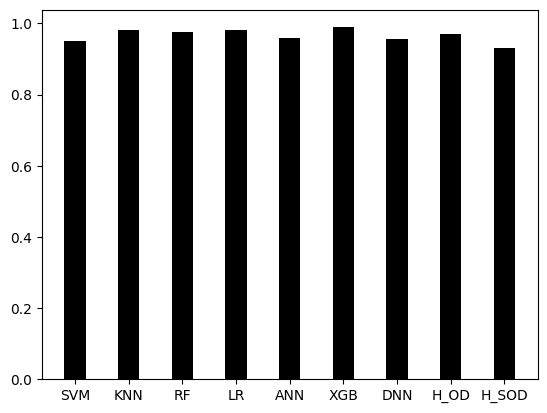

In [288]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)